# 2. Безопасность данных

Безопасность данных важна... каждый год утечки больших фрагментов БД крупных компаний. Цифровой след превращается в цифровой хвост. Расцвет [Форензики](https://habr.com/ru/articles/327740/) и [OSINT](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D0%B7%D0%B2%D0%B5%D0%B4%D0%BA%D0%B0_%D0%BF%D0%BE_%D0%BE%D1%82%D0%BA%D1%80%D1%8B%D1%82%D1%8B%D0%BC_%D0%B8%D1%81%D1%82%D0%BE%D1%87%D0%BD%D0%B8%D0%BA%D0%B0%D0%BC) (open Source INTelligence) - разведка на основе окрытых данных.

## 2.1 Метаданные изображений стандарта EXIF
Это особый формат метаданных, который вы можете увидеть в ОС или в редакторе, когда простматриваете файл и и по контекстному меню смотрите **"Свойства"**. Массовое распространение смартфонов: влияние на **конфиденциальность** и **безопасность**.

Фотографии, сделанные на смартфон или цифровую камеру, содержат **метаданные**, которые являются дополнительной информацией о фотографии. Эти метаданные хранятся в формате **EXIF**(**[EXchangeable Image File format](https://en.wikipedia.org/wiki/Exif)**), стандарт для информации, добавляемой к цифровым изображениям и аудио.

**EXIF может включать:**
- Размеры и плотность пикселей фото.
- Марка и модель устройства, на котором был сделан снимок.
- Масштабирование, диафрагма, вспышка и другие настройки камеры при съёмке фотографии.
- Ориентация устройства при фотографировании.
- Когда было сделано фото.
- Где было сделано фото.
- В каком направлении была обращена камера.
- Высота, на которой был сделан снимок.

EXIF полезен для сортировки и поиска изображений, но есть у него и обратная сторона...
В 2012 году основатель антивирусной компании Джон Макафи (McAfee Antivirus) уклонялся от действий правоохранительных органов, но давал эксклюзивные, пользующиеся большим спросом интервью. Один журналист опубликовал фотографию Макафи, не удалив EXIF-данные. Это и раскрыло его местонахождение и привело к аресту.

Правоохранительные органы арестовывают подозреваемых, используя фото из соцсетей, потому что подозреваемые не принимали меры предосторожности и не «очищали» свои данные EXIF в процессе загрузки (далее это учли разработчики: Telegram автоматически удаляет большую часть EXIF при загрузке фото, то же самое касается многих других соцсетей и мессенджеров).

**Важные вопросы при работе с массивами (датасетами) изображений:**

- Как программно обнаруживать и читать EXIF-метаданные изображения?
- Как программно изменять, добавлять или удалять EXIF-метаданные?

### Работа с EXIF

Есть уудобные онлайн инструемнты работы с EXIF, но... скорее всего, данные EXIF, которые Вы извлекаете останутся на сайте. Ах да, к ним могут добавиться **данные о Вас** :) Выход - работа оффлайн независимыми программными инструментами python:
- Бибилиотека PIL (Pillow)
- Модуль exif

### Работа с EXIF в Pillow
**[Pillow](https://pillow.readthedocs.io/en/stable/?badge=latest)** - "боковая версия" PIL (Python Imaging Library). Реализована концепция EXIF-тэгов - номеров, которым соответсвуют переменные EXIF.

In [1]:
import PIL
from PIL import Image
import os
import cv2

In [2]:
# импорт отдельных EXIF-тэгов из модуля PIL 
from PIL.ExifTags import Base 
from PIL.ExifTags import GPS

# по имени тэга можно получить номер:
print(Base.ImageDescription.value)
print(GPS.GPSDestLatitude.value)

270
20


In [3]:
# и наоборот, по номеру - имя
print(Base(270).name)
print(GPS(20).name)

ImageDescription
GPSDestLatitude


In [4]:
# импорт всех EXIF-тэгов
from PIL.ExifTags import TAGS
print(TAGS)
print(len(TAGS)) #273 тэга

{1: 'InteropIndex', 11: 'ProcessingSoftware', 254: 'NewSubfileType', 255: 'SubfileType', 256: 'ImageWidth', 257: 'ImageLength', 258: 'BitsPerSample', 259: 'Compression', 262: 'PhotometricInterpretation', 263: 'Thresholding', 264: 'CellWidth', 265: 'CellLength', 266: 'FillOrder', 269: 'DocumentName', 270: 'ImageDescription', 271: 'Make', 272: 'Model', 273: 'StripOffsets', 274: 'Orientation', 277: 'SamplesPerPixel', 278: 'RowsPerStrip', 279: 'StripByteCounts', 280: 'MinSampleValue', 281: 'MaxSampleValue', 282: 'XResolution', 283: 'YResolution', 284: 'PlanarConfiguration', 285: 'PageName', 288: 'FreeOffsets', 289: 'FreeByteCounts', 290: 'GrayResponseUnit', 291: 'GrayResponseCurve', 292: 'T4Options', 293: 'T6Options', 296: 'ResolutionUnit', 297: 'PageNumber', 301: 'TransferFunction', 305: 'Software', 306: 'DateTime', 315: 'Artist', 316: 'HostComputer', 317: 'Predictor', 318: 'WhitePoint', 319: 'PrimaryChromaticities', 320: 'ColorMap', 321: 'HalftoneHints', 322: 'TileWidth', 323: 'TileLengt

### Доступ к метаданным

In [6]:
openpth = '338.JPG' # путь к файлу (файлам)
img = Image.open(openpth)

In [7]:
metadata = img._getexif()
metadata # словарь индексов тэгов и соответсвующие значения (некоторые в форме байт-строк)

{34853: {0: b'\x02\x00\x00\x00',
  1: 'N',
  2: (61.463978, 0.0, 0.0),
  3: 'E',
  4: (30.468369, 0.0, 0.0),
  5: 0,
  6: 293.8,
  18: 'WGS-84'},
 50341: b'PrintIM\x000300\x00\x00\x03\x00\x02\x00\x01\x00\x00\x00\x03\x00"\x00\x00\x00\x01\x01\x00\x00\x00\x00\t\x11\x00\x00\x10\'\x00\x00\x0b\x0f\x00\x00\x10\'\x00\x00\x97\x05\x00\x00\x10\'\x00\x00\xb0\x08\x00\x00\x10\'\x00\x00\x01\x1c\x00\x00\x10\'\x00\x00^\x02\x00\x00\x10\'\x00\x00\x8b\x00\x00\x00\x10\'\x00\x00\xcb\x03\x00\x00\x10\'\x00\x00\xe5\x1b\x00\x00\x10\'\x00\x00',
 296: 2,
 34665: 376,
 270: '                               ',
 271: 'SONY',
 272: 'ILCE-6000',
 305: 'ILCE-6000 v3.20',
 274: 3,
 306: '2020:04:30 08:05:48',
 531: 2,
 282: 350.0,
 283: 350.0,
 36864: b'0230',
 37121: b'\x01\x02\x03\x00',
 37122: 3.0,
 36867: '2020:04:30 08:05:48',
 36868: '2020:04:30 08:05:48',
 37379: 5.30234375,
 37380: 0.0,
 37381: 1.6953125,
 37383: 5,
 37384: 0,
 37385: 16,
 37386: 35.0,
 37510: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [8]:
metadata[34853] # доступ по индексу (ключ словаря) к конкретному тэгу элементу данных

{0: b'\x02\x00\x00\x00',
 1: 'N',
 2: (61.463978, 0.0, 0.0),
 3: 'E',
 4: (30.468369, 0.0, 0.0),
 5: 0,
 6: 293.8,
 18: 'WGS-84'}

In [8]:
isinstance(metadata[41728], bytes) # это байт-строка

True

In [9]:
s = metadata[41728].decode()
s

'\x03'

In [10]:
s = metadata[41728].decode('utf-8') # (пока) не получается декодировать... но главное у нас уже есть!
s

'\x03'

### Словарь тэгов: доступ к занчениям по ключу-индексу

In [11]:
PIL.ExifTags.TAGS[1]

'InteropIndex'

In [12]:
PIL.ExifTags.TAGS[2] # несуществующий ключ (индексы не по порядку и это неудобно)

KeyError: 2

### Генератор словаря - пример

In [13]:
a = [i*2 for i in range(10)]
a

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [14]:
b = [i for i in a[::2]]
b

[0, 4, 8, 12, 16]

Заменяем номер индекса на значение ппеременной для удобства чтения. Делаем "питоничным" способоми (pythonic way) - используем **[генератор словаря](https://www.freecodecamp.org/news/dictionary-comprehension-in-python-explained-with-examples/)** (dict comprehension) чтобы подставить значения по ключам одного словаря в качестве ключей другому словарю.

In [15]:
# простой пример с условием if
dict1 = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}

In [16]:
dict1['b']

2

In [17]:
dict2 = {k:v for k, v in dict1.items() if v > 2}
dict2

{'c': 3, 'd': 4, 'e': 5}

In [18]:
# словарь, из которого хотим взять занчения чтобы подставить ключами в целевой словарь
data_dict = {
    1: 'latitude',
    2: 'longitude',
    3: 'altitude',
}

data_dict

{1: 'latitude', 2: 'longitude', 3: 'altitude'}

In [19]:
# целевой словарь (в нашем случае - прочитанные меетаданные EXIF)
big_data = {
    1: '61.463978',
    2: '30.468369',
    3: '293',
    4: '3',
    5: 'some string',
    6: '2',
    7: '350.0',
    8: '350.0',
    #...
    #...
}

In [20]:
big_data

{1: '61.463978',
 2: '30.468369',
 3: '293',
 4: '3',
 5: 'some string',
 6: '2',
 7: '350.0',
 8: '350.0'}

Новый словарь с помощью генератора словаря. Значения, полученные обращением по ключам первого словаря и подставляются ключами целевого:

In [21]:
data_keys = {data_dict[k]: v for k, v in big_data.items() if k in data_dict}
data_keys

{'latitude': '61.463978', 'longitude': '30.468369', 'altitude': '293'}

In [22]:
exif = {
    PIL.ExifTags.TAGS[k]: v
    for k, v in img.getexif().items()
    if k in PIL.ExifTags.TAGS
}

exif

{'GPSInfo': 19312,
 'PrintImageMatching': b'PrintIM\x000300\x00\x00\x03\x00\x02\x00\x01\x00\x00\x00\x03\x00"\x00\x00\x00\x01\x01\x00\x00\x00\x00\t\x11\x00\x00\x10\'\x00\x00\x0b\x0f\x00\x00\x10\'\x00\x00\x97\x05\x00\x00\x10\'\x00\x00\xb0\x08\x00\x00\x10\'\x00\x00\x01\x1c\x00\x00\x10\'\x00\x00^\x02\x00\x00\x10\'\x00\x00\x8b\x00\x00\x00\x10\'\x00\x00\xcb\x03\x00\x00\x10\'\x00\x00\xe5\x1b\x00\x00\x10\'\x00\x00',
 'ResolutionUnit': 2,
 'ExifOffset': 376,
 'ImageDescription': '                               ',
 'Make': 'SONY',
 'Model': 'ILCE-6000',
 'Software': 'ILCE-6000 v3.20',
 'Orientation': 3,
 'DateTime': '2020:04:30 08:05:48',
 'YCbCrPositioning': 2,
 'XResolution': 350.0,
 'YResolution': 350.0}

In [23]:
exif_all = {
    PIL.ExifTags.TAGS[k]: v
    for k, v in img._getexif().items() # другой метод, более "служебный"
    if k in PIL.ExifTags.TAGS
}

exif_all

{'GPSInfo': {0: b'\x02\x00\x00\x00',
  1: 'N',
  2: (61.463978, 0.0, 0.0),
  3: 'E',
  4: (30.468369, 0.0, 0.0),
  5: 0,
  6: 293.8,
  18: 'WGS-84'},
 'PrintImageMatching': b'PrintIM\x000300\x00\x00\x03\x00\x02\x00\x01\x00\x00\x00\x03\x00"\x00\x00\x00\x01\x01\x00\x00\x00\x00\t\x11\x00\x00\x10\'\x00\x00\x0b\x0f\x00\x00\x10\'\x00\x00\x97\x05\x00\x00\x10\'\x00\x00\xb0\x08\x00\x00\x10\'\x00\x00\x01\x1c\x00\x00\x10\'\x00\x00^\x02\x00\x00\x10\'\x00\x00\x8b\x00\x00\x00\x10\'\x00\x00\xcb\x03\x00\x00\x10\'\x00\x00\xe5\x1b\x00\x00\x10\'\x00\x00',
 'ResolutionUnit': 2,
 'ExifOffset': 376,
 'ImageDescription': '                               ',
 'Make': 'SONY',
 'Model': 'ILCE-6000',
 'Software': 'ILCE-6000 v3.20',
 'Orientation': 3,
 'DateTime': '2020:04:30 08:05:48',
 'YCbCrPositioning': 2,
 'XResolution': 350.0,
 'YResolution': 350.0,
 'ExifVersion': b'0230',
 'ComponentsConfiguration': b'\x01\x02\x03\x00',
 'CompressedBitsPerPixel': 3.0,
 'DateTimeOriginal': '2020:04:30 08:05:48',
 'DateTimeDi

In [24]:
exif_all['GPSInfo'] # вытаскиваем координаты

{0: b'\x02\x00\x00\x00',
 1: 'N',
 2: (61.463978, 0.0, 0.0),
 3: 'E',
 4: (30.468369, 0.0, 0.0),
 5: 0,
 6: 293.8,
 18: 'WGS-84'}

In [25]:
coords = f"{exif_all['GPSInfo'][1]}: {exif_all['GPSInfo'][2]}" # f-строка с двойными кавычками, одинарные уже используются
coords

'N: (61.463978, 0.0, 0.0)'

### Удаление EXIF с помощью Pillow

In [37]:
%%time

def no_exif (openpth, savepth):
    
    '''
    fn that copy imgs without exif metadata
    '''
    
    i = 0
    for f in os.listdir(openpth):
        image = Image.open(openpth + f)

        # next 3 lines strip exif
        data = list(image.getdata())
        image_without_exif = Image.new(image.mode, image.size)
        image_without_exif.putdata(data)
        image_without_exif.save(savepth + f)
        i += 1
        
    return 'finished: exif cleared for '+ str(i) + ' files'

openpth = os.getcwd()+ '/1/'
savepth = os.getcwd()+ '/2/'

no_exif (openpth, savepth)

CPU times: total: 10.5 s
Wall time: 10.5 s


'finished: exif cleared for 2 files'


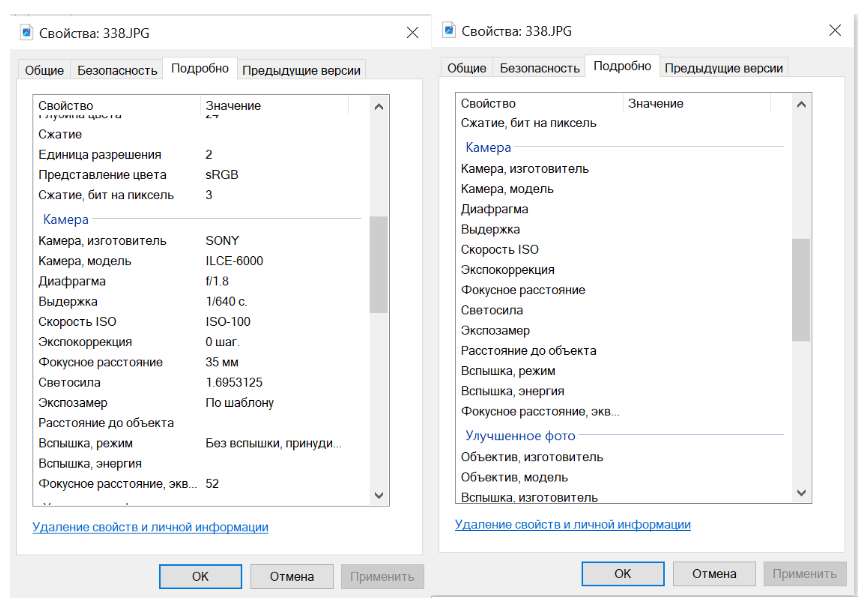


### Перезапись без EXIF
Перезапись всех изображений определенного формата в текущей диреткории без EXIF

In [38]:
#текущачя директория с библиотекой os
current_dir = os.path.abspath(os.curdir)

# ищем все файлы расширения jpg
for f in os.scandir(current_dir):
    if f.is_file() and f.path.split('.')[-1].lower() == 'jpg': # .jpg и .JPG, но есть еще .jpeg и .JPEG*
        image = Image.open(f.path)
        image.save(f.path)

In [42]:
A = 'AAA'
A = A.lower()
A

'aaa'

**jpg .jpeg один и тот же формат (в старых системах расширение файла моглдо иметь до трех букв), сохранились оба расширения*

### Редактирование и удаление EXIF c модулем exif
Специализированный модуль для работы с метаданными EXIF. Преимущество модуля - EXIF-тэги идут сразу в в иде понятных имен вместо индексов. Вводная статья по работе с модулем **[exif](https://habr.com/ru/company/skillfactory/blog/551002/)**

Здесь файлы открываются только для чтения, данные файла считываются в двоичном режиме в объект файла и создается экземпляр объекта exif-Image. Объекты Image можно помнестить в массив для выполнения операций над всем массивом.

In [46]:
from exif import Image

with open("338.JPG", "rb") as img1:
     img1 = Image(img1)
    
with open("343.JPG", "rb") as img2:
     img2 = Image(img2)
    
images = [img1, img2]

In [47]:
img1.has_exif, img2.has_exif # изображения имеют метаданные

(True, True)

In [48]:
img1.exif_version # версия стандарта метаданных

'0230'

Пары «ключ-значение» EXIF - теги, каждый тег может содержать строковое или числовое значение. В стандарте EXIF 2.32 десятки тегов, производители смартфонов и камер и фотографоы могут добавлять собственные теги. Фотографии, снятые разными камерами и смартфонами, могут иметь разные наборы тегов. **[Полный список](https://exiftool.org/TagNames/EXIF.html)** стандартных тегов

In [28]:
dir(img1) # список всех тегов данного изображения

['<unknown EXIF tag 50341>',
 '_exif_ifd_pointer',
 '_gps_ifd_pointer',
 '_interoperability_ifd_Pointer',
 '_segments',
 'brightness_value',
 'color_space',
 'components_configuration',
 'compressed_bits_per_pixel',
 'compression',
 'contrast',
 'custom_rendered',
 'datetime',
 'datetime_digitized',
 'datetime_original',
 'delete',
 'delete_all',
 'digital_zoom_ratio',
 'exif_version',
 'exposure_bias_value',
 'exposure_mode',
 'exposure_program',
 'exposure_time',
 'f_number',
 'file_source',
 'flash',
 'flashpix_version',
 'focal_length',
 'focal_length_in_35mm_film',
 'get',
 'get_all',
 'get_file',
 'get_thumbnail',
 'gps_altitude',
 'gps_altitude_ref',
 'gps_latitude',
 'gps_latitude_ref',
 'gps_longitude',
 'gps_longitude_ref',
 'gps_map_datum',
 'gps_version_id',
 'has_exif',
 'image_description',
 'jpeg_interchange_format',
 'jpeg_interchange_format_length',
 'lens_model',
 'lens_specification',
 'light_source',
 'list_all',
 'make',
 'maker_note',
 'max_aperture_value',
 'mete

In [50]:
print(img1.gps_altitude) # доступ к значениям тегов
print(img2.color_space)

293.8
ColorSpace.SRGB


In [51]:
img1.delete('gps_altitude') # удаление конкретного тега

In [52]:
img1.gps_altitude

AttributeError: image does not have attribute gps_altitude

In [53]:
img1.delete_all()

C:\Users\merr\anaconda3\lib\site-packages\exif\_image.py:154: RuntimeWarning: could not delete tag <unknown EXIF tag 50341>
  warnings.warn("could not delete tag " + tag, RuntimeWarning)


In [54]:
img1.has_exif # не все удалил, но...

True

In [41]:
dir(img1) # ... почти все - остался кастомный тег 50341

['<unknown EXIF tag 50341>',
 '_exif_ifd_pointer',
 '_gps_ifd_pointer',
 '_segments',
 'delete',
 'delete_all',
 'exif_version',
 'get',
 'get_all',
 'get_file',
 'get_thumbnail',
 'has_exif',
 'list_all']

Но если посмотреть изображение в проводнике - данные EXIF не изменились. Дело в том, что все операции проводились с **копией изображения в буфере**. Для сохранения нужно эту копию записать поверх исходного файла (или файла с другим имененм).

In [47]:
with open('338.JPG', 'wb') as updated_img: # переписываем поверх оригинала с удаленными EXIF
    updated_img.write(img1.get_file())

Почему фото с EXIF и без EXIF имеют разный размер? Дело в сжатии и декодировании при преобразовании форматов (и параметров по умолчнию для этого сжатьия в разных программах), т.е. само изображение меняется. Потому работа со специализированным модулем exif имеет преимущество - само изображение остается нетронутым.

### Хеширование данных
**Хеширование** — процесс преобразования данных в строки фиксированного размера, обычно используется для быстрого поиска и сравнения данных. В python хеширование часто применяется для создания уникальных идентификаторов, проверки целостности данных и работы с хеш-таблицами (основа python-словарей - поэтому поиск в python по словарю гораздо быстрее чем по списку). Хеширование играет ключевую роль в криптографии, безопасности данных и оптимизация алгоритмов поиска, проверке целостности и аутентичности данных.

**[Хеш-функции](https://yourtodo.ru/posts/heshirovanie-v-python/)** — алгоритмы, которые преобразуют входные данные любой длины в фиксированный набор байтов (хеш-код). Цель хеш-функции — обеспечить уникальное представление каждого уникального входа. Хеш-функция принимает на вход строку для хеширования и тип алгоритма хеширования, на выходе - хешированная строка. По такой строке исходную строку получить очень трудно (крайне маловероятно). Поэтому хеширование является односторонним процессом - восстановить исходные данные из хеша невозможно. **Вывод:** иметь в надежном месте копию нез хешированных данных.

Функция **hash()** из состава стандартной библиотеки python: базовые операции хеширования, не криптостойкая - **НЕ ИСПОЛЬЗОВАТЬ** для хеширования данных и в контексте безопасности данных! Нужна больше для создания хеш-таблиц - структур с воможностью быстрого поиска по уникальным хеш-значениям (словари python).

In [55]:
hash(777)

777

In [56]:
# хеш от числа разных типов одинаков и возвращает это число
print(hash(1))
print(hash(5))

print(hash(225))
print(hash(225.0))

1
5
225
225


In [57]:
hash('1') # хеш строки возвращает не связанное с ней число

8436176718057988366

In [59]:
print(hash('строка')) # небольшое изменение в строке --> абсолютно другой хеш
print(hash('строки'))

2323614341585490678
9153419202231620592


In [60]:
hash((1,2,3)) # хеш от контейнеров (коллекций), в т.ч. числовых - тоже не связанное число

529344067295497451

**hashlib** - родная битблиотека в python для генерации хешей к данным, использующая большой набор алгоритмов (MD5, SHA-1, SHA-256 и других). Современные алгоритмы - SHA-256 и SHA-3, обеспечивают высокий уровень безопасности.

In [61]:
import pandas as pd
import hashlib as hl

telemetry = pd.read_csv('telemetry.csv')
telemetry.head()

,image,date,time,lat,lon,alt,pitch,roll,azimuth,GPS_speed
0,DSC00003.JPG,2020/04/30,"04:47:07,00",61.521366,30.339928,18.3,0.5,0.0,140.0,0.00
1,DSC00004.JPG,2020/04/30,"04:47:07,00",61.521366,30.339928,18.3,0.5,0.0,140.0,0.00
2,DSC00005.JPG,2020/04/30,"04:47:09,00",61.521366,30.339930,18.4,0.6,-0.4,140.0,0.00
3,DSC00006.JPG,2020/04/30,"04:47:10,00",61.521366,30.339931,18.6,0.6,-0.5,140.0,0.00
4,DSC00007.JPG,2020/04/30,"05:00:10,00",61.503338,30.437277,295.6,0.7,1.8,97.0,81.36


In [63]:
data = telemetry['image'][1]
data

'DSC00004.JPG'

In [3]:
#при введении hl нажать tab: список алгоритмов хеширования. MD5 и SHA-1 уже считается не очнеь надежными
# hl.

Перед подачей в хеш-функцию строку нужно перевести в т.н. байт-строку:

In [64]:
en_cyr = "Hello Привет"
en_cyr_coded = en_cyr.encode('utf-8')
en_cyr_coded # как выглядит кириллица в байт-строке

b'Hello \xd0\x9f\xd1\x80\xd0\xb8\xd0\xb2\xd0\xb5\xd1\x82'

In [65]:
data_encoded = telemetry['image'][1].encode('utf-8')
data_encoded

b'DSC00004.JPG'

In [66]:
hl.sha256(data_encoded) # объект хеш и его расположение в конкретной ячейке памяти

<sha256 _hashlib.HASH object @ 0x00000215030E7E10>

In [67]:
hl.sha256(data_encoded).hexdigest() # шестнадцатиричное значение хеша

'1dd31e027c4ccc0ed487fbd94d6a21471796395bafa191f8682ae31c40f97cd2'

Изменение всего **одного символа** в исходной строке: совершенно другой вывод, не связанный с предыдущим

In [68]:
data2 = data[1:]
data2

'SC00004.JPG'

In [69]:
hl.sha256(data2.encode('utf-8')).hexdigest() # совсем другой хеш

'11cbdd05af6e8b21813cfe3cbc7e0384dc868abf9a49966d355524ac40783905'

## Аттестационный кейс:
**Вам нужно передать датасет изображений с БПЛА и соответсвующую телеметрию "третьему лицу"...**
1. Удаление метаданных изображений
2. Хеширование чувствительной информации в файле телеметрии

Функция для построчного хеширования данных конкретного столбца (метод **[apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)** в pandas). Данный метод позволяет применять стандартные или собсвтенные функцию к конкретным столбцам или строкам датафрейма.

In [70]:
def hashing(row):
    return hl.sha224(row['image'].encode('utf-8')).hexdigest()
    
telemetry['hashed_image'] = telemetry.apply(hashing, axis=1)
telemetry.head()

,image,date,time,lat,lon,alt,pitch,roll,azimuth,GPS_speed,hashed_image
0,DSC00003.JPG,2020/04/30,"04:47:07,00",61.521366,30.339928,18.3,0.5,0.0,140.0,0.00,e547c4b7923188dfb42fb7bd187f68714f3a4d9b63b8f3...
1,DSC00004.JPG,2020/04/30,"04:47:07,00",61.521366,30.339928,18.3,0.5,0.0,140.0,0.00,7af729a0337ebb06ce1179cacc889fb9a8677c3630124c...
2,DSC00005.JPG,2020/04/30,"04:47:09,00",61.521366,30.339930,18.4,0.6,-0.4,140.0,0.00,75ae4088893e23bd0a567511a7f2ca7fac0a87fb3034e5...
3,DSC00006.JPG,2020/04/30,"04:47:10,00",61.521366,30.339931,18.6,0.6,-0.5,140.0,0.00,a60cd7e2219cb6e18f25dbb8943ff819ff54757e036eef...
4,DSC00007.JPG,2020/04/30,"05:00:10,00",61.503338,30.437277,295.6,0.7,1.8,97.0,81.36,3bfd3277f51c1d06102182dd1c6ac564513252d1b63fb9...
